In [1]:
import glob
from pyskl.smp import *
from pyskl.utils.visualize import Vis3DPose, Vis2DPose
from mmcv import load, dump
import os

/home/trungct/miniconda3/envs/pyskl/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.1.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  RequestsDependencyWarning,


In [2]:
with open('../tools/data/label_map/nturgbd_120.txt', 'r') as file:
    labels = [label.strip() for label in file.readlines()]

In [7]:
# Download annotations
download_file('http://download.openmmlab.com/mmaction/pyskl/demo/annotations/ntu60_samples_hrnet.pkl', 'ntu60_2d.pkl')
download_file('http://download.openmmlab.com/mmaction/pyskl/demo/annotations/ntu60_samples_3danno.pkl', 'ntu60_3d.pkl')

In [55]:
# Visualize 2D Skeletons without video
annotations = load('../data/nturgbd/ntu60_hrnet.pkl')['annotations']
annotations = [anno for anno in annotations if labels[anno['label']] == "reading"]
index = 5
anno = annotations[index]
print(f"Label: {labels[anno['label']]}")
vid = Vis2DPose(anno, thre=0.2, out_shape=(540, 960), layout='coco', fps=30, video=None)
# vid.ipython_display()
# vid.write_videofile('trung.mp4')

Label: reading


100%|██████████| 108/108 [00:00<00:00, 3359.10it/s]


Moviepy - Building video trung.mp4.
Moviepy - Writing video trung.mp4



Moviepy - Done !
Moviepy - video ready trung.mp4


In [6]:
# Visualize 2D Skeletons without video
annotations = load('../data/nturgbd/ntu60_hrnet.pkl')['annotations']
for anno_type in labels:
    save_dir = f'examples/{anno_type}'
    os.makedirs(save_dir, exist_ok=True)
    anns = [anno for anno in annotations if labels[anno['label']] == anno_type]
    if len(anns) < 10:
        print(anno_type)
    # for i in range(10):
    #     anno = anns[i]
    #     vid = Vis2DPose(anno, thre=0.2, out_shape=(540, 960), layout='coco', fps=30, video=None)
    #     vid.write_videofile(os.path.join(save_dir, f"{i}.mp4"), verbose = False, logger = None)

put on headphone
take off headphone
shoot at the basket
bounce ball
tennis bat swing
juggling table tennis balls
hush (quite)
flick hair
thumb up
thumb down
make ok sign
make victory sign
staple book
counting money
cutting nails
cutting paper (using scissors)
snapping fingers
open bottle
sniff (smell)
squat down
toss a coin
fold paper
ball up paper
play magic cube
apply cream on face
apply cream on hand back
put on bag
take off bag
put something into a bag
take something out of a bag
open a box
move heavy objects
shake fist
throw up cap/hat
hands up (both hands)
cross arms
arm circles
arm swings
running on the spot
butt kicks (kick backward)
cross toe touch
side kick
yawn
stretch oneself
blow nose
hit other person with something
wield knife towards other person
knock over other person (hit with body)
grab other person’s stuff
shoot at other person with a gun
step on foot
high-five
cheers and drink
carry something with other person
take a photo of other person
follow other person
whispe

In [ ]:
# Visualize 2D Skeletons with the original RGB Video
annotations = load('ntu60_2d.pkl')
index = 0
anno = annotations[index]
frame_dir = anno['frame_dir']
video_url = f"http://download.openmmlab.com/mmaction/pyskl/demo/nturgbd/{frame_dir}.avi"
download_file(video_url, frame_dir + '.avi')
vid = Vis2DPose(anno, thre=0.2, out_shape=(540, 960), layout='coco', fps=12, video=frame_dir + '.avi')
vid.ipython_display()

MovieWriter stderr:
[libopenh264 @ 0x563f9eabc340] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x800', '-pix_fmt', 'rgba', '-r', '12', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'S013C002P019R001A034.mp4']' returned non-zero exit status 1.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9daa6d87a0> (for post_execute):


AttributeError: can't set attribute

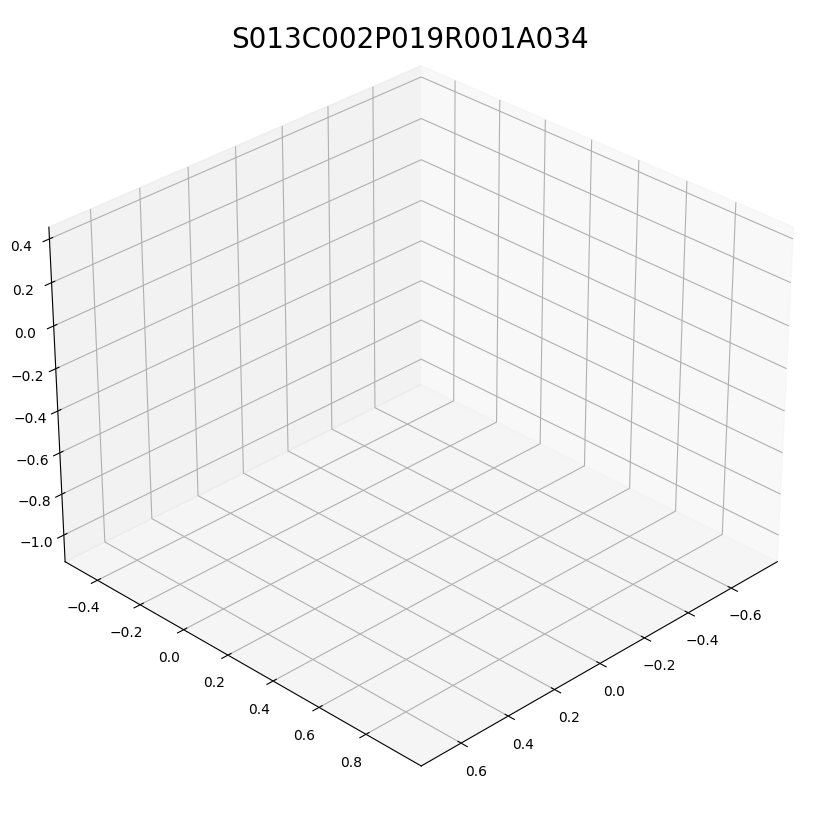

In [2]:
# Visualize 3D Skeletons
from pyskl.datasets.pipelines import PreNormalize3D
annotations = load('ntu60_3d.pkl')
index = 0
anno = annotations[index]
anno = PreNormalize3D()(anno)  # * Need Pre-Normalization before Visualization
vid = Vis3DPose(anno, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), with_grid=False)
vid.ipython_display()

In [ ]:
# Clean directories
os.remove('ntu60_3d.pkl')
os.remove('ntu60_2d.pkl')
for f in glob.glob("S*.avi"):
    os.remove(f)
os.remove('__temp__.mp4')